In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import confusion_matrix
import cv2
import pandas as pd
from glob import glob
import tkinter
import seaborn as sns
tkinter.Tk().withdraw() # prevents an empty tkinter window from appearing

''

In [2]:
def greater_length(a, b):

    if len(a)>len(b):
        return a
    
    else:
        return b

In [3]:

data_ref=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/cd3_postive_nuclei/"+"/*.npy"))

data_same = pd.DataFrame(columns=['Name', 'TP', 'TN', 'FN', 'FP', 'Accuracy', 'F1 Score', 'Sensitivity', 'Specificity'])
data_serial = pd.DataFrame(columns=['Name', 'TP', 'TN', 'FN', 'FP', 'Accuracy', 'F1 Score', 'Sensitivity', 'Specificity'])



for k in data_ref:

    print(k[-7:])

    gt_cd3p = "/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/cd3_postive_nuclei/" + k[-7:]
    gt_data_cd3p = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/cd3_postive_nuclei/" + k[-7:])
    same_pred_cd3p = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Same/CD3P/" + k[-7:])
    serial_pred_cd3p = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Serial/CD3P/" + k[-7:])


    gt_data_cd3n = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/cd3_negative_nuclei/" + k[-7:])
    same_pred_cd3n = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Same/CD3N/" + k[-7:])
    serial_pred_cd3n = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Serial/CD3N/" + k[-7:])



    unique_gt_cd3p = np.unique(gt_data_cd3p)
    unique_gt_cd3n = np.unique(gt_data_cd3n)

    gt_common_indexes = np.intersect1d(unique_gt_cd3p, unique_gt_cd3n)
    gt_common_indexes

    for i in gt_common_indexes:

        if i!=0:

            if np.count_nonzero(gt_data_cd3p == i)>=np.count_nonzero(gt_data_cd3n == i):
                
                gt_data_cd3p[gt_data_cd3n==i]=i
                gt_data_cd3n[gt_data_cd3n==i]=0  
            
            if np.count_nonzero(gt_data_cd3p == i)<np.count_nonzero(gt_data_cd3n == i):

                gt_data_cd3n[gt_data_cd3p==i]=i
                gt_data_cd3p[gt_data_cd3p==i]=0
    
    unique_samepred_cd3p = np.unique(same_pred_cd3p)
    unique_samepred_cd3n = np.unique(same_pred_cd3n)

    same_pred_common_indexes = np.intersect1d(unique_samepred_cd3p, unique_samepred_cd3n)
    same_pred_common_indexes

    for i in same_pred_common_indexes:

        if i!=0:

            if np.count_nonzero(same_pred_cd3p == i)>=np.count_nonzero(same_pred_cd3n == i):
                
                same_pred_cd3p[same_pred_cd3n==i]=i
                same_pred_cd3n[same_pred_cd3n==i]=0  
            
            if np.count_nonzero(same_pred_cd3p == i)<np.count_nonzero(same_pred_cd3n == i):

                same_pred_cd3n[same_pred_cd3p==i]=i
                same_pred_cd3p[same_pred_cd3p==i]=0
    
    gt_p = []
    gt_n = []
    pred_p = []
    pred_n = []

    gt = []
    pred = []

    v1,c1=np.unique(gt_data_cd3p,return_counts=True)
    gt_p = v1[(v1 != 0)]

    v2,c2=np.unique(gt_data_cd3n,return_counts=True)
    gt_n = v2[(v2 != 0)]

    v3,c3=np.unique(same_pred_cd3p,return_counts=True)
    pred_p = v3[~np.isin(v3, pred_p) & (v3 != 0)]

        
    v4,c4=np.unique(same_pred_cd3n,return_counts=True)
    pred_n = v4[~np.isin(v4, pred_n) & (v4 != 0)]

    tp = set(gt_p)&set(pred_p)
    tn = set(gt_n)&set(pred_n)
    fn = (set(pred_n)-(set(pred_n)&set(gt_n))).union(set(gt_p)-set(pred_p))
    fp = (set(pred_p)-(set(pred_p)&set(gt_p))).union(set(gt_n)-set(pred_n))

    if not (len(tp)==0 and len(tn)==0 and len(fn)==0 and len(fp)==0):

            if (len(tp)+len(fn))>0 and ((len(tn)+len(fp)))>0 and (len(tp)+len(fp)):

                precision = len(tp)/(len(tp)+len(fp))
                recall = len(tp)/(len(tp)+len(fn))

                if (precision+recall)>0:

                    f1_score = 2*(precision*recall)/(precision+recall)

                    data_same = data_same.append({'Name': gt_cd3p.split("/")[-1], 'TP': len(tp), 'TN': len(tn), 'FN': len(fn), 'FP': len(fp), 'Accuracy': (len(tp)+len(tn))/(len(tp)+len(tn)+len(fp)+len(fn)), 'F1 Score': f1_score, 'Sensitivity': ((len(tp))/(len(tp)+len(fn))), 'Specificity': ((len(tn))/(len(tn)+len(fp)))}, ignore_index=True)
    
    unique_serialpred_cd3p = np.unique(serial_pred_cd3p)
    unique_serialpred_cd3n = np.unique(serial_pred_cd3n)

    serial_pred_common_indexes = np.intersect1d(unique_serialpred_cd3p, unique_serialpred_cd3n)
    serial_pred_common_indexes

    for i in serial_pred_common_indexes:

        if i!=0:

            if np.count_nonzero(serial_pred_cd3p == i)>=np.count_nonzero(serial_pred_cd3n == i):
                
                serial_pred_cd3p[serial_pred_cd3n==i]=i
                serial_pred_cd3n[serial_pred_cd3n==i]=0  
            
            if np.count_nonzero(serial_pred_cd3p == i)<np.count_nonzero(serial_pred_cd3n == i):

                serial_pred_cd3n[serial_pred_cd3p==i]=i
                serial_pred_cd3p[serial_pred_cd3p==i]=0

    gt_p = []
    gt_n = []
    pred_p = []
    pred_n = []

    gt = []
    pred = []

    v1,c1=np.unique(gt_data_cd3p,return_counts=True)
    gt_p = v1[(v1 != 0)]

    v2,c2=np.unique(gt_data_cd3n,return_counts=True)
    gt_n = v2[(v2 != 0)]
        

    v3,c3=np.unique(serial_pred_cd3p,return_counts=True)
    pred_p = v3[~np.isin(v3, pred_p) & (v3 != 0)]

        
    v4,c4=np.unique(serial_pred_cd3n,return_counts=True)
    pred_n = v4[~np.isin(v4, pred_n) & (v4 != 0)]

    tp = set(gt_p)&set(pred_p)
    tn = set(gt_n)&set(pred_n)
    fn = (set(pred_n)-(set(pred_n)&set(gt_n))).union(set(gt_p)-set(pred_p))
    fp = (set(pred_p)-(set(pred_p)&set(gt_p))).union(set(gt_n)-set(pred_n))


    if not (len(tp)==0 and len(tn)==0 and len(fn)==0 and len(fp)==0):

            if (len(tp)+len(fn))>0 and ((len(tn)+len(fp)))>0 and (len(tp)+len(fp)):

                precision = len(tp)/(len(tp)+len(fp))
                recall = len(tp)/(len(tp)+len(fn))

                if (precision+recall)>0:

                    f1_score = 2*((precision*recall)/(precision+recall))

                    data_serial = data_serial.append({'Name': gt_cd3p.split("/")[-1], 'TP': len(tp), 'TN': len(tn), 'FN': len(fn), 'FP': len(fp), 'Accuracy': (len(tp)+len(tn))/(len(tp)+len(tn)+len(fp)+len(fn)), 'F1 Score': f1_score, 'Sensitivity': ((len(tp))/(len(tp)+len(fn))), 'Specificity': ((len(tn))/(len(tn)+len(fp)))}, ignore_index=True)

000.npy


/tmp/ipykernel_1061759/1243548806.py:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_same = data_same.append({'Name': gt_cd3p.split("/")[-1], 'TP': len(tp), 'TN': len(tn), 'FN': len(fn), 'FP': len(fp), 'Accuracy': (len(tp)+len(tn))/(len(tp)+len(tn)+len(fp)+len(fn)), 'F1 Score': f1_score, 'Sensitivity': ((len(tp))/(len(tp)+len(fn))), 'Specificity': ((len(tn))/(len(tn)+len(fp)))}, ignore_index=True)
/tmp/ipykernel_1061759/1243548806.py:162: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_serial = data_serial.append({'Name': gt_cd3p.split("/")[-1], 'TP': len(tp), 'TN': len(tn), 'FN': len(fn), 'FP': len(fp), 'Accuracy': (len(tp)+len(tn))/(len(tp)+len(tn)+len(fp)+len(fn)), 'F1 Score': f1_score, 'Sensitivity': ((len(tp))/(len(tp)+len(fn))), 'Specificity': ((len(tn))/(len(tn)+len(fp)))}, ignore_index=True)


001.npy


KeyboardInterrupt: 

In [ ]:
data_same.to_csv("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/same.csv", index=False)

In [ ]:
data_serial.to_csv("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/serial.csv", index=False)

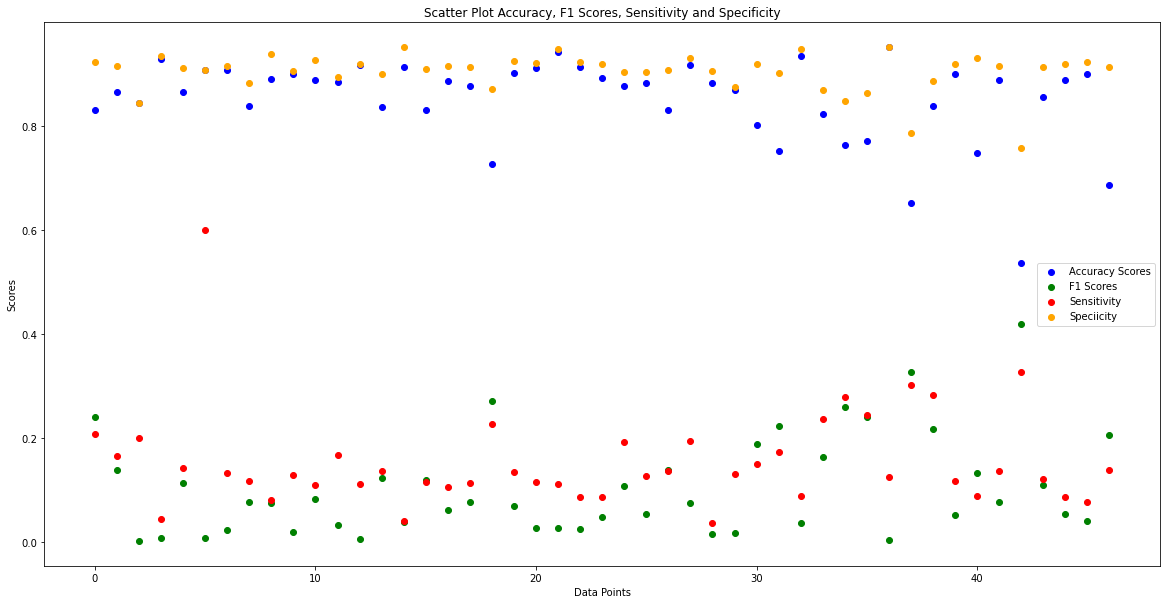

In [22]:
accuracy_scores = data_same['Accuracy']
f1_scores = data_same['F1 Score']
sens = data_same['Sensitivity']
spec = data_same['Specificity']

# Create a scatter plot for accuracy scores
plt.figure(figsize=(20, 10))
plt.scatter(range(len(accuracy_scores)), accuracy_scores, color='blue', label='Accuracy Scores')

# Create a scatter plot for F1 scores with a different color
plt.scatter(range(len(f1_scores)), f1_scores, color='green', label='F1 Scores')

# Create a scatter plot for Sensitivity with a different color
plt.scatter(range(len(sens)), sens, color='red', label='Sensitivity')

# Create a scatter plot for Speciicity with a different color
plt.scatter(range(len(spec)), spec, color='orange', label='Speciicity')

# Set plot labels and title
plt.xlabel('Data Points')
plt.ylabel('Scores')
plt.title('Scatter Plot Accuracy, F1 Scores, Sensitivity and Specificity')

# Display the legend
plt.legend()

# Show the plot
plt.show()

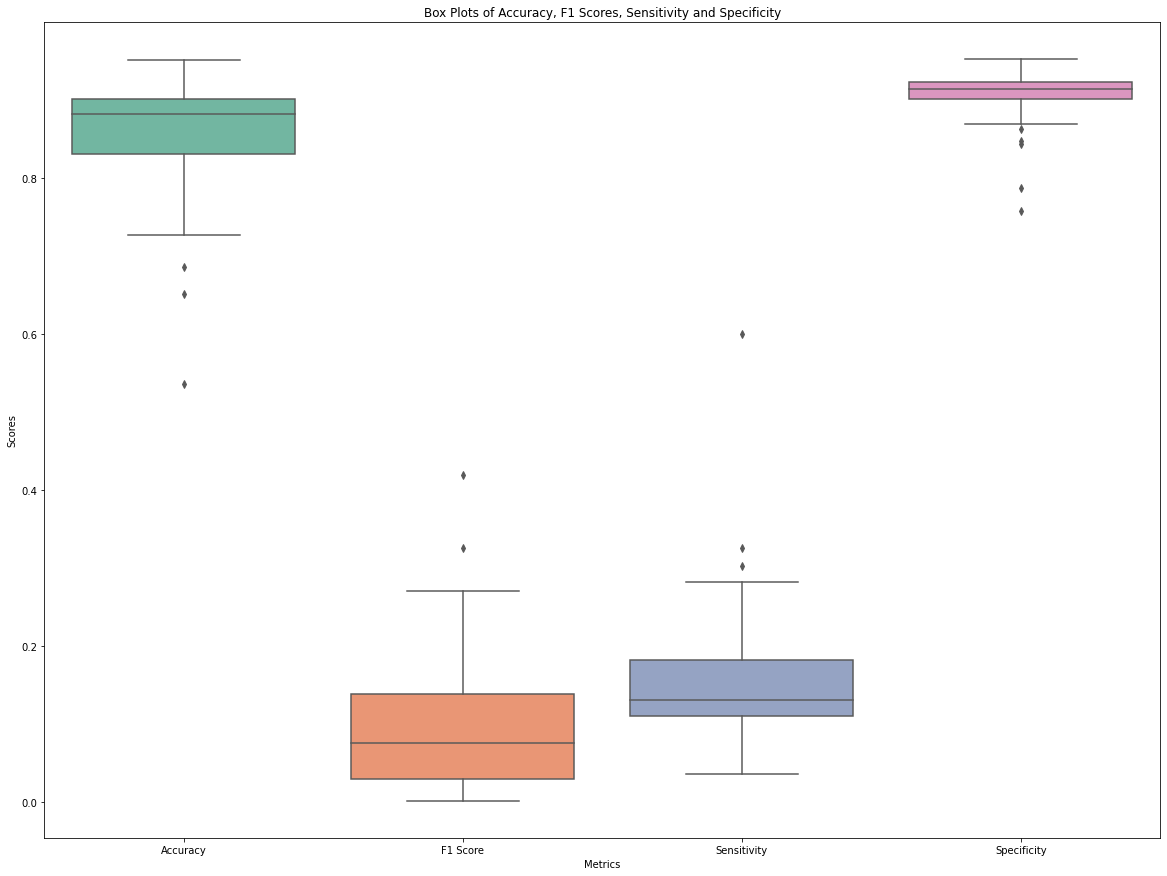

In [17]:
accuracy_scores = data_same['Accuracy']
f1_scores = data_same['F1 Score']
sens = data_same['Sensitivity']
spec = data_same['Specificity']


# Create a DataFrame for box plot
data_for_box_plot = pd.DataFrame({'Accuracy': accuracy_scores, 'F1 Score': f1_scores, 'Sensitivity': sens, 'Specificity': spec})

# Create box plots using Seaborn
plt.figure(figsize=(20, 15))
sns.boxplot(data=data_for_box_plot, palette='Set2')

# Set plot labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Box Plots of Accuracy, F1 Scores, Sensitivity and Specificity')

# Show the plot
plt.show()


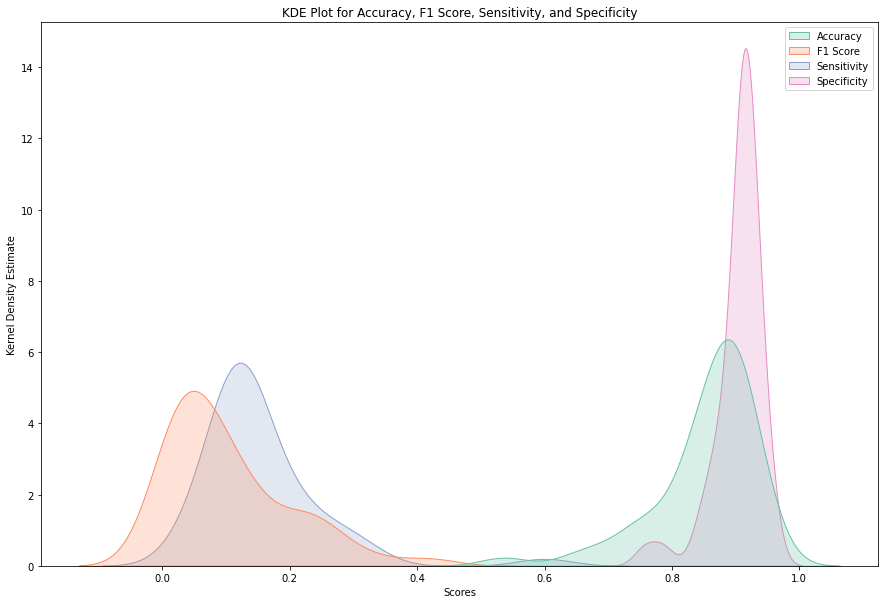

In [25]:
accuracy_scores = data_same['Accuracy']
f1_scores = data_same['F1 Score']
sensitivity_scores = data_same['Sensitivity']
specificity_scores = data_same['Specificity']

# Create a DataFrame for KDE plot
data_for_kde_plot = pd.DataFrame({
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Sensitivity': sensitivity_scores,
    'Specificity': specificity_scores
})

# Create KDE plots using Seaborn
plt.figure(figsize=(15, 10))
sns.kdeplot(data=data_for_kde_plot, fill=True, palette='Set2', common_norm=False)

# Set plot labels and title
plt.xlabel('Scores')
plt.ylabel('Kernel Density Estimate')
plt.title('KDE Plot for Accuracy, F1 Score, Sensitivity, and Specificity')

# Show the plot
plt.show()


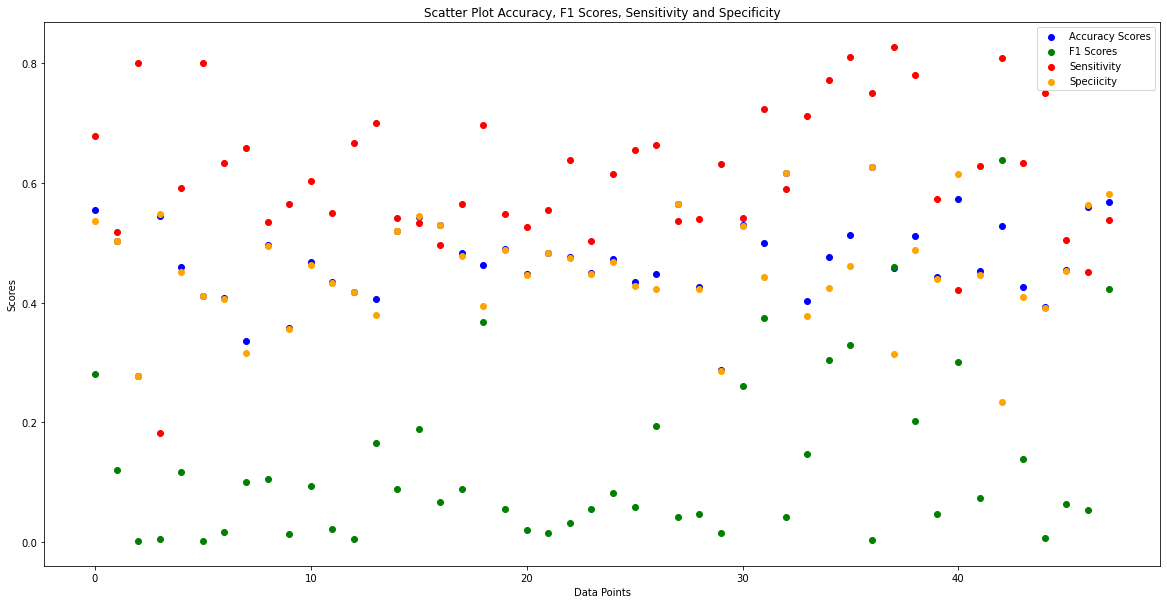

In [23]:
accuracy_scores = data_serial['Accuracy']
f1_scores = data_serial['F1 Score']
sens = data_serial['Sensitivity']
spec = data_serial['Specificity']

# Create a scatter plot for accuracy scores
plt.figure(figsize=(20, 10))
plt.scatter(range(len(accuracy_scores)), accuracy_scores, color='blue', label='Accuracy Scores')

# Create a scatter plot for F1 scores with a different color
plt.scatter(range(len(f1_scores)), f1_scores, color='green', label='F1 Scores')

# Create a scatter plot for Sensitivity with a different color
plt.scatter(range(len(sens)), sens, color='red', label='Sensitivity')

# Create a scatter plot for Speciicity with a different color
plt.scatter(range(len(spec)), spec, color='orange', label='Speciicity')

# Set plot labels and title
plt.xlabel('Data Points')
plt.ylabel('Scores')
plt.title('Scatter Plot Accuracy, F1 Scores, Sensitivity and Specificity')

# Display the legend
plt.legend()

# Show the plot
plt.show()

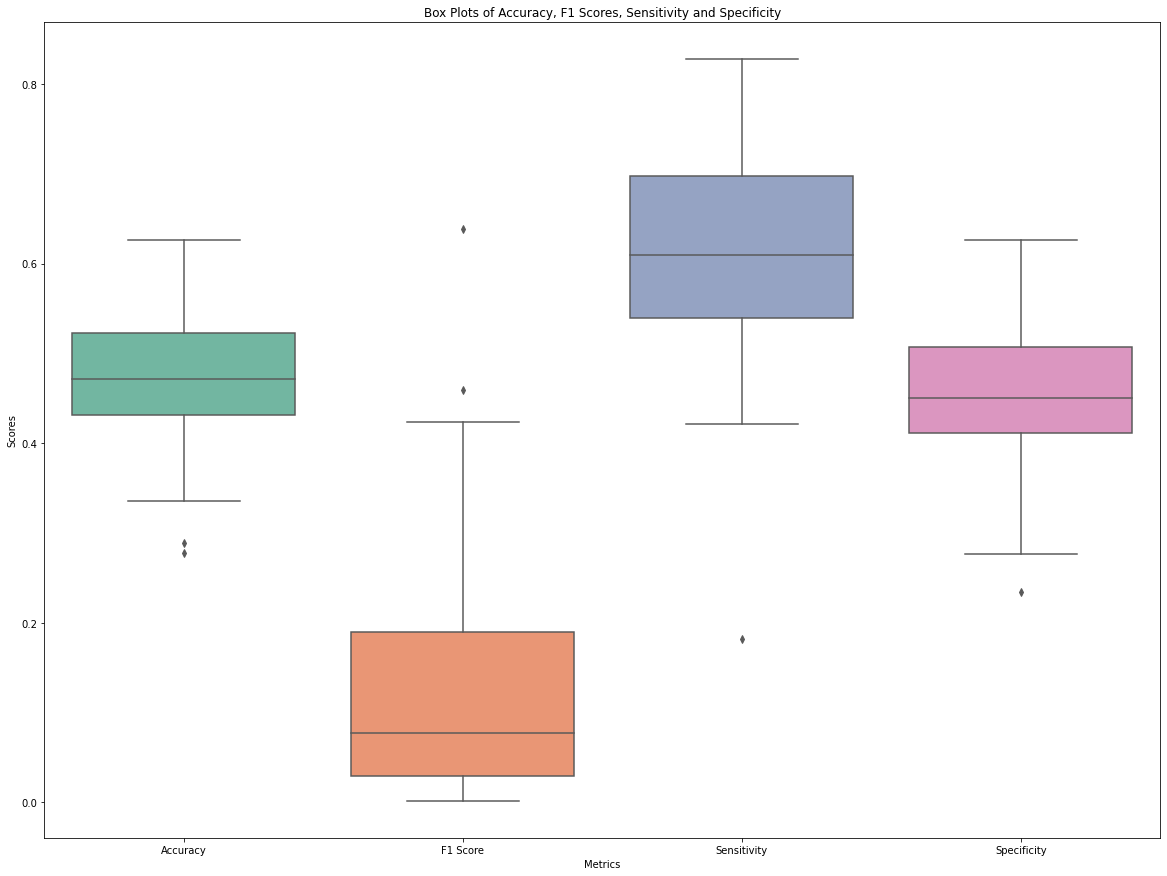

In [24]:
accuracy_scores = data_serial['Accuracy']
f1_scores = data_serial['F1 Score']
sens = data_serial['Sensitivity']
spec = data_serial['Specificity']


# Create a DataFrame for box plot
data_for_box_plot = pd.DataFrame({'Accuracy': accuracy_scores, 'F1 Score': f1_scores, 'Sensitivity': sens, 'Specificity': spec})

# Create box plots using Seaborn
plt.figure(figsize=(20, 15))
sns.boxplot(data=data_for_box_plot, palette='Set2')

# Set plot labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Box Plots of Accuracy, F1 Scores, Sensitivity and Specificity')

# Show the plot
plt.show()

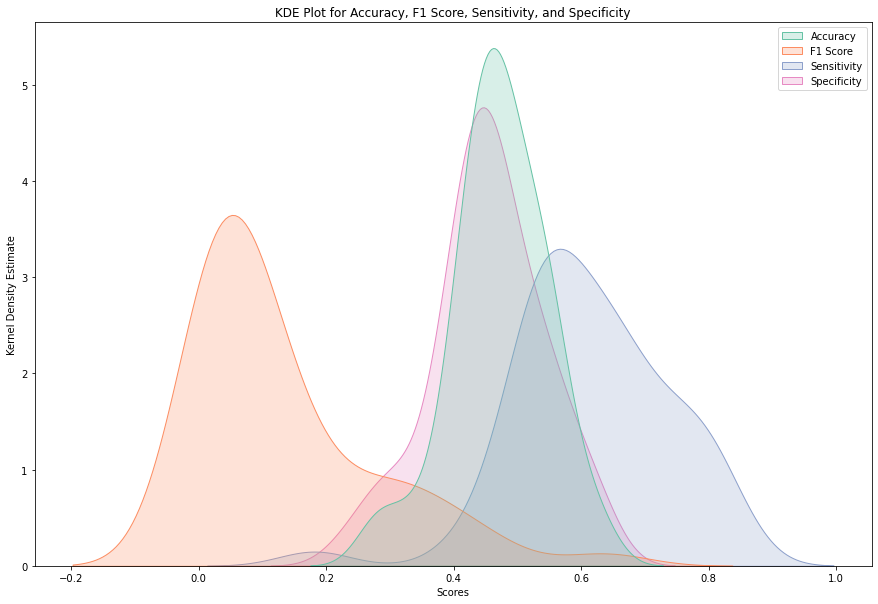

In [26]:
accuracy_scores = data_serial['Accuracy']
f1_scores = data_serial['F1 Score']
sensitivity_scores = data_serial['Sensitivity']
specificity_scores = data_serial['Specificity']

# Create a DataFrame for KDE plot
data_for_kde_plot = pd.DataFrame({
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Sensitivity': sensitivity_scores,
    'Specificity': specificity_scores
})

# Create KDE plots using Seaborn
plt.figure(figsize=(15, 10))
sns.kdeplot(data=data_for_kde_plot, fill=True, palette='Set2', common_norm=False)

# Set plot labels and title
plt.xlabel('Scores')
plt.ylabel('Kernel Density Estimate')
plt.title('KDE Plot for Accuracy, F1 Score, Sensitivity, and Specificity')

# Show the plot
plt.show()